# <center> *Europe - Covid 19 Report* <center/>
## <center> *Date: 08.02.2021* <center/>
## <center> *Created By: Tal Levi* <center/>

In [1]:
import pandas as pd
from analysis.classes import Continent
from datetime import datetime, date
import plotly
plotly.io.orca.config.executable = r'C:\Users\talle\AppData\Local\Programs\orca\orca.exe'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
continent = Continent('Europe')
df = continent.data  # Pandas df object, that contains the data from the db.


### Part One - Data information

In [3]:
print(continent)


Continent name: Europe
Continents id: 4
First update: 2020-08-02
Last update: 2021-02-07
Data number of rows: 174
Data number of columns: 10
Columns: 
['Scrap_time', 'Date', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'SeriousCritical']
		


In [4]:
df.dtypes

Scrap_time                 object
Date               datetime64[ns]
TotalCases                  int64
NewCases                  float64
TotalDeaths                 int64
NewDeaths                 float64
TotalRecovered              int64
NewRecovered              float64
ActiveCases                 int64
SeriousCritical             int64
dtype: object

In [5]:

print('Number of null values are:')
pd.DataFrame(df.isnull().sum()).rename(columns = {0:'null_count'})

Number of null values are:


null_count
Scrap_time                0
Date                      0
TotalCases                0
NewCases                  1
TotalDeaths               0
NewDeaths                 1
TotalRecovered            0
NewRecovered              1
ActiveCases               0
SeriousCritical           0

In [6]:
print('The first five rows of the data:')
df.head(5)

The first five rows of the data:


Scrap_time       Date  TotalCases   NewCases  TotalDeaths  \
0  2020-08-02 20:00:00 2020-08-02     2897099        NaN       203786   
1  2020-08-08 20:00:00 2020-08-08     3022202 125103.000       205937   
2  2020-08-12 20:00:00 2020-08-12     3092002  69800.000       206983   
3  2020-08-16 20:00:00 2020-08-16     3157905  65903.000       203082   
4  2020-08-17 20:00:00 2020-08-17     3179431  21526.000       203324   

   NewDeaths  TotalRecovered  NewRecovered  ActiveCases  SeriousCritical  
0        NaN         1748058           NaN       945255             5151  
1   2151.000         1816295     68237.000       999970             5175  
2   1046.000         1857591     41296.000      1027428             5190  
3  -3901.000         1908629     51038.000      1046194             5180  
4    242.000         1916149      7520.000      1059958             5218

In [7]:
print('The last five rows of the data.:')
df.tail(5)


The last five rows of the data.:


Scrap_time       Date  TotalCases   NewCases  TotalDeaths  \
169  2021-02-04 12:00:13 2021-02-03    30732503 179736.000       719682   
170  2021-02-05 12:00:12 2021-02-04    30915328 182825.000       724809   
171  2021-02-06 12:00:13 2021-02-05    31088032 172704.000       730478   
172  2021-02-07 21:06:30 2021-02-06    31218809 130777.000       734084   
173  2021-02-08 12:00:13 2021-02-07    31328244 109435.000       736460   

     NewDeaths  TotalRecovered  NewRecovered  ActiveCases  SeriousCritical  
169   5937.000        17423069    133032.000     12589752            29667  
170   5127.000        17562209    139140.000     12628310            29378  
171   5669.000        17709513    147304.000     12648041            29308  
172   3606.000        17843014    133501.000     12641711            29068  
173   2376.000        17941646     98632.000     12650138            29050

### Part Two - Data Visualization
#### Cumulative data

In [8]:
continent.linear_plot(save = True)

#### Three months measures

In [9]:
months_info = continent.three_months_info()
months_info

Year Month  ActiveCasesAvg RecoveredSum DeathsSum   CasesSum CriticalSum
0  2020   Nov   8,250,892.667    3,515,232   128,253  7,298,995     843,775
1  2020   Dec  10,396,316.645    4,325,079   149,918  6,411,153     837,361
2  2021   Jan  11,910,170.133    5,344,695   159,005  6,625,833     874,406

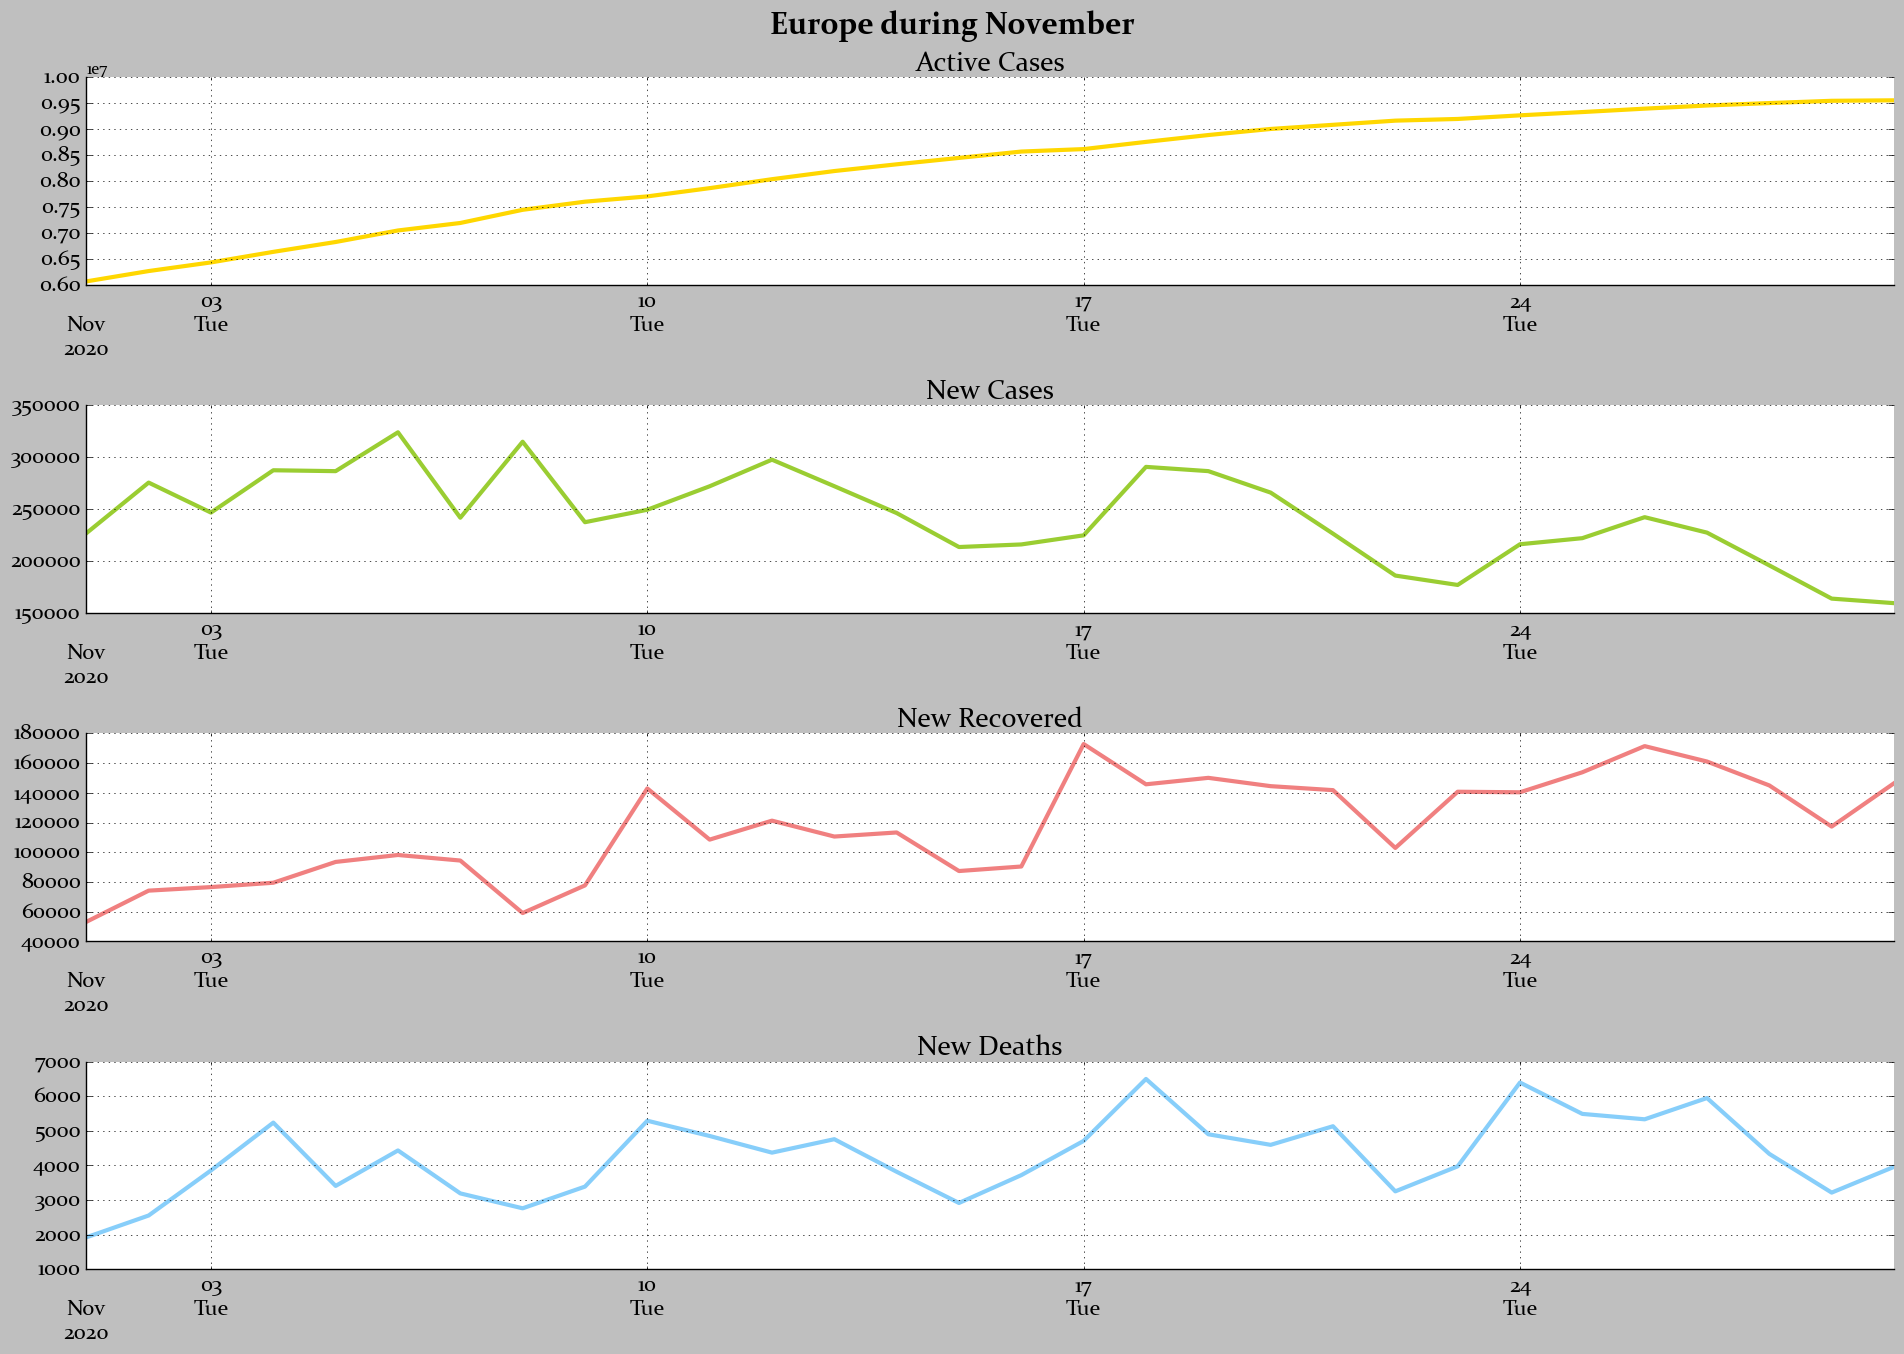

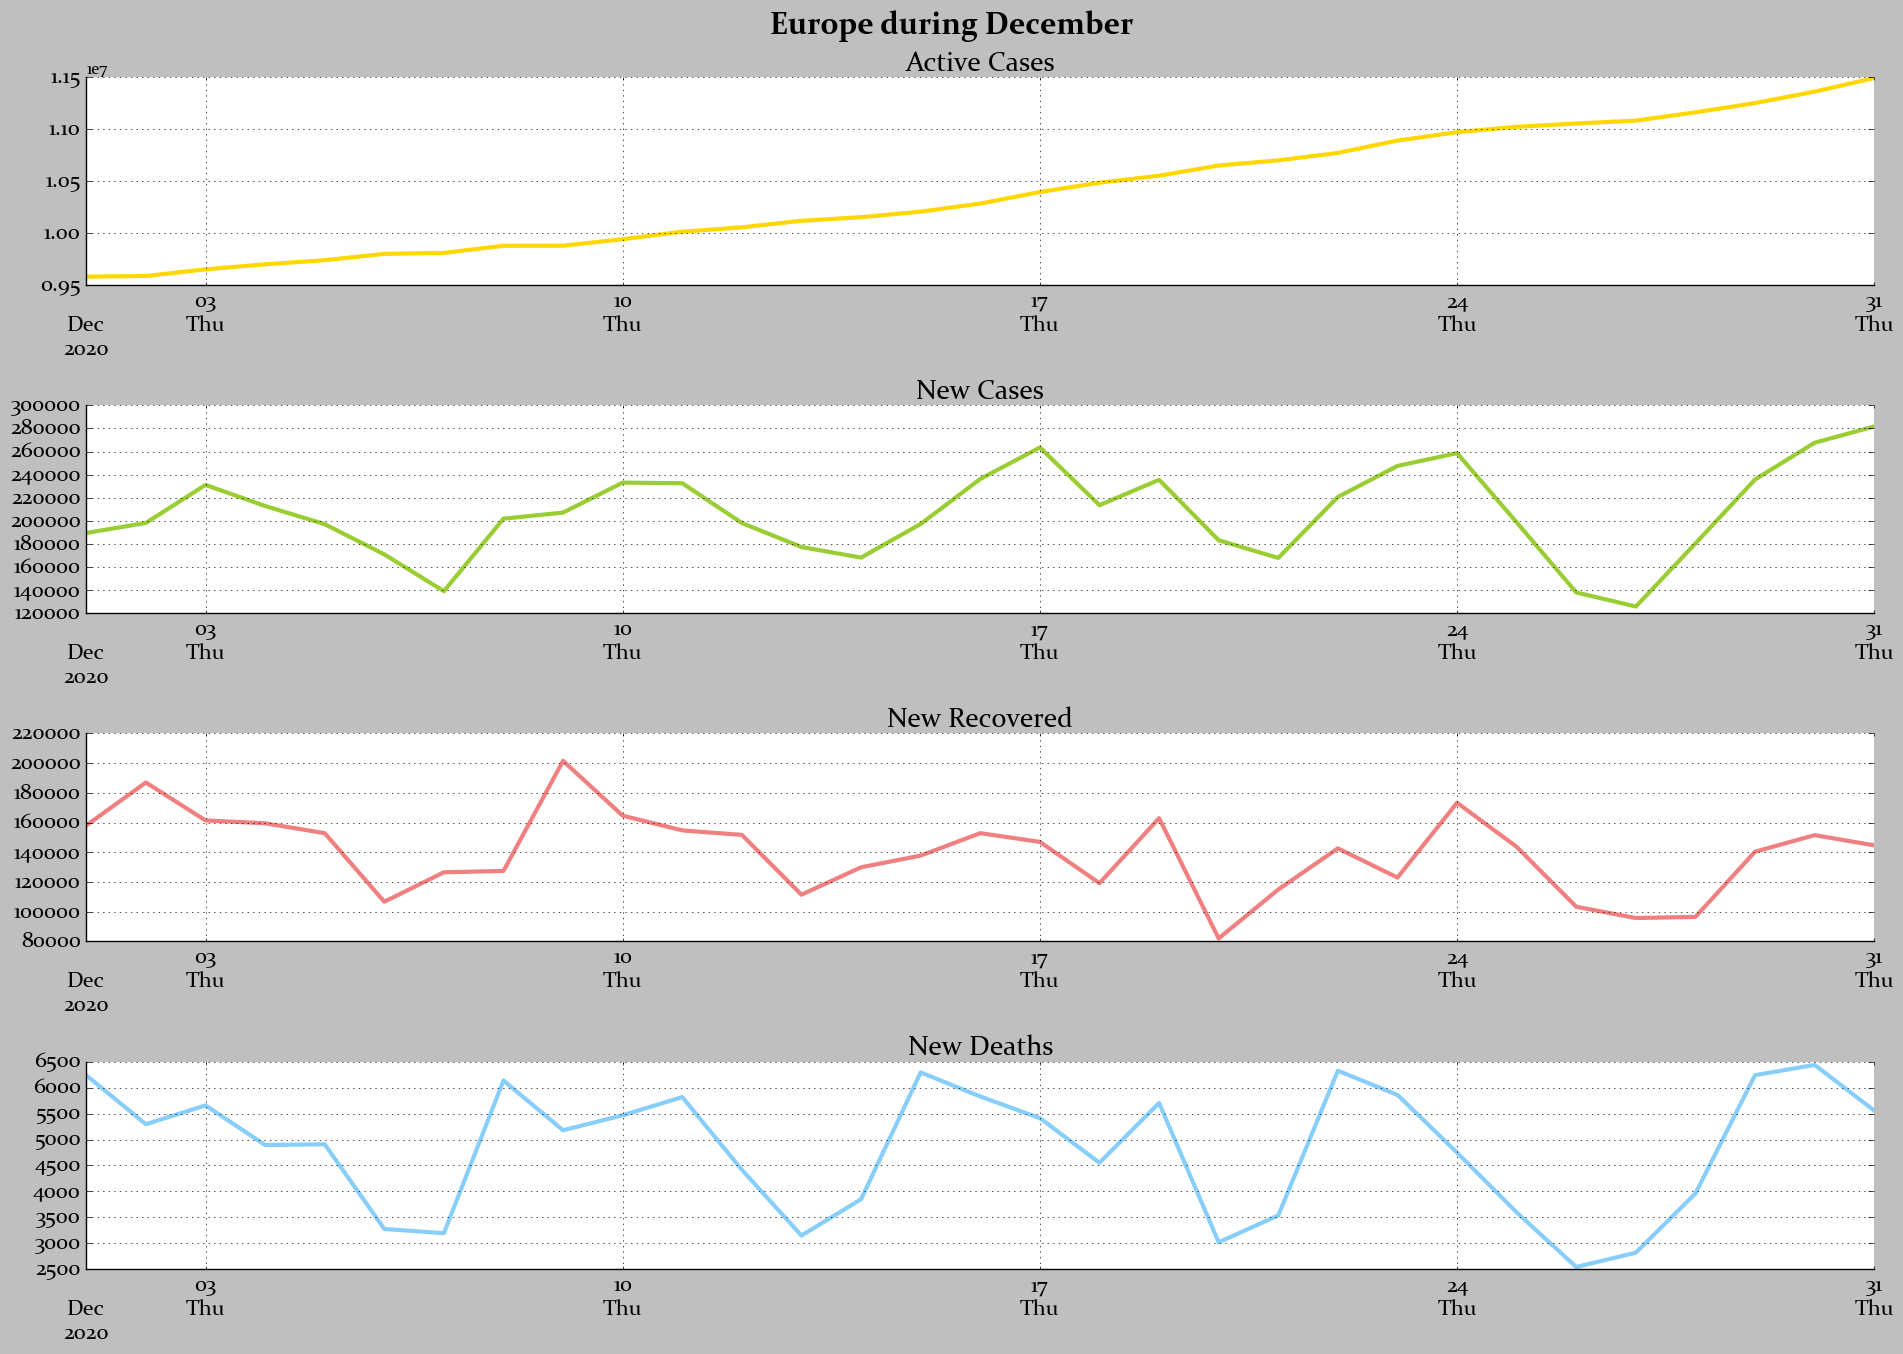

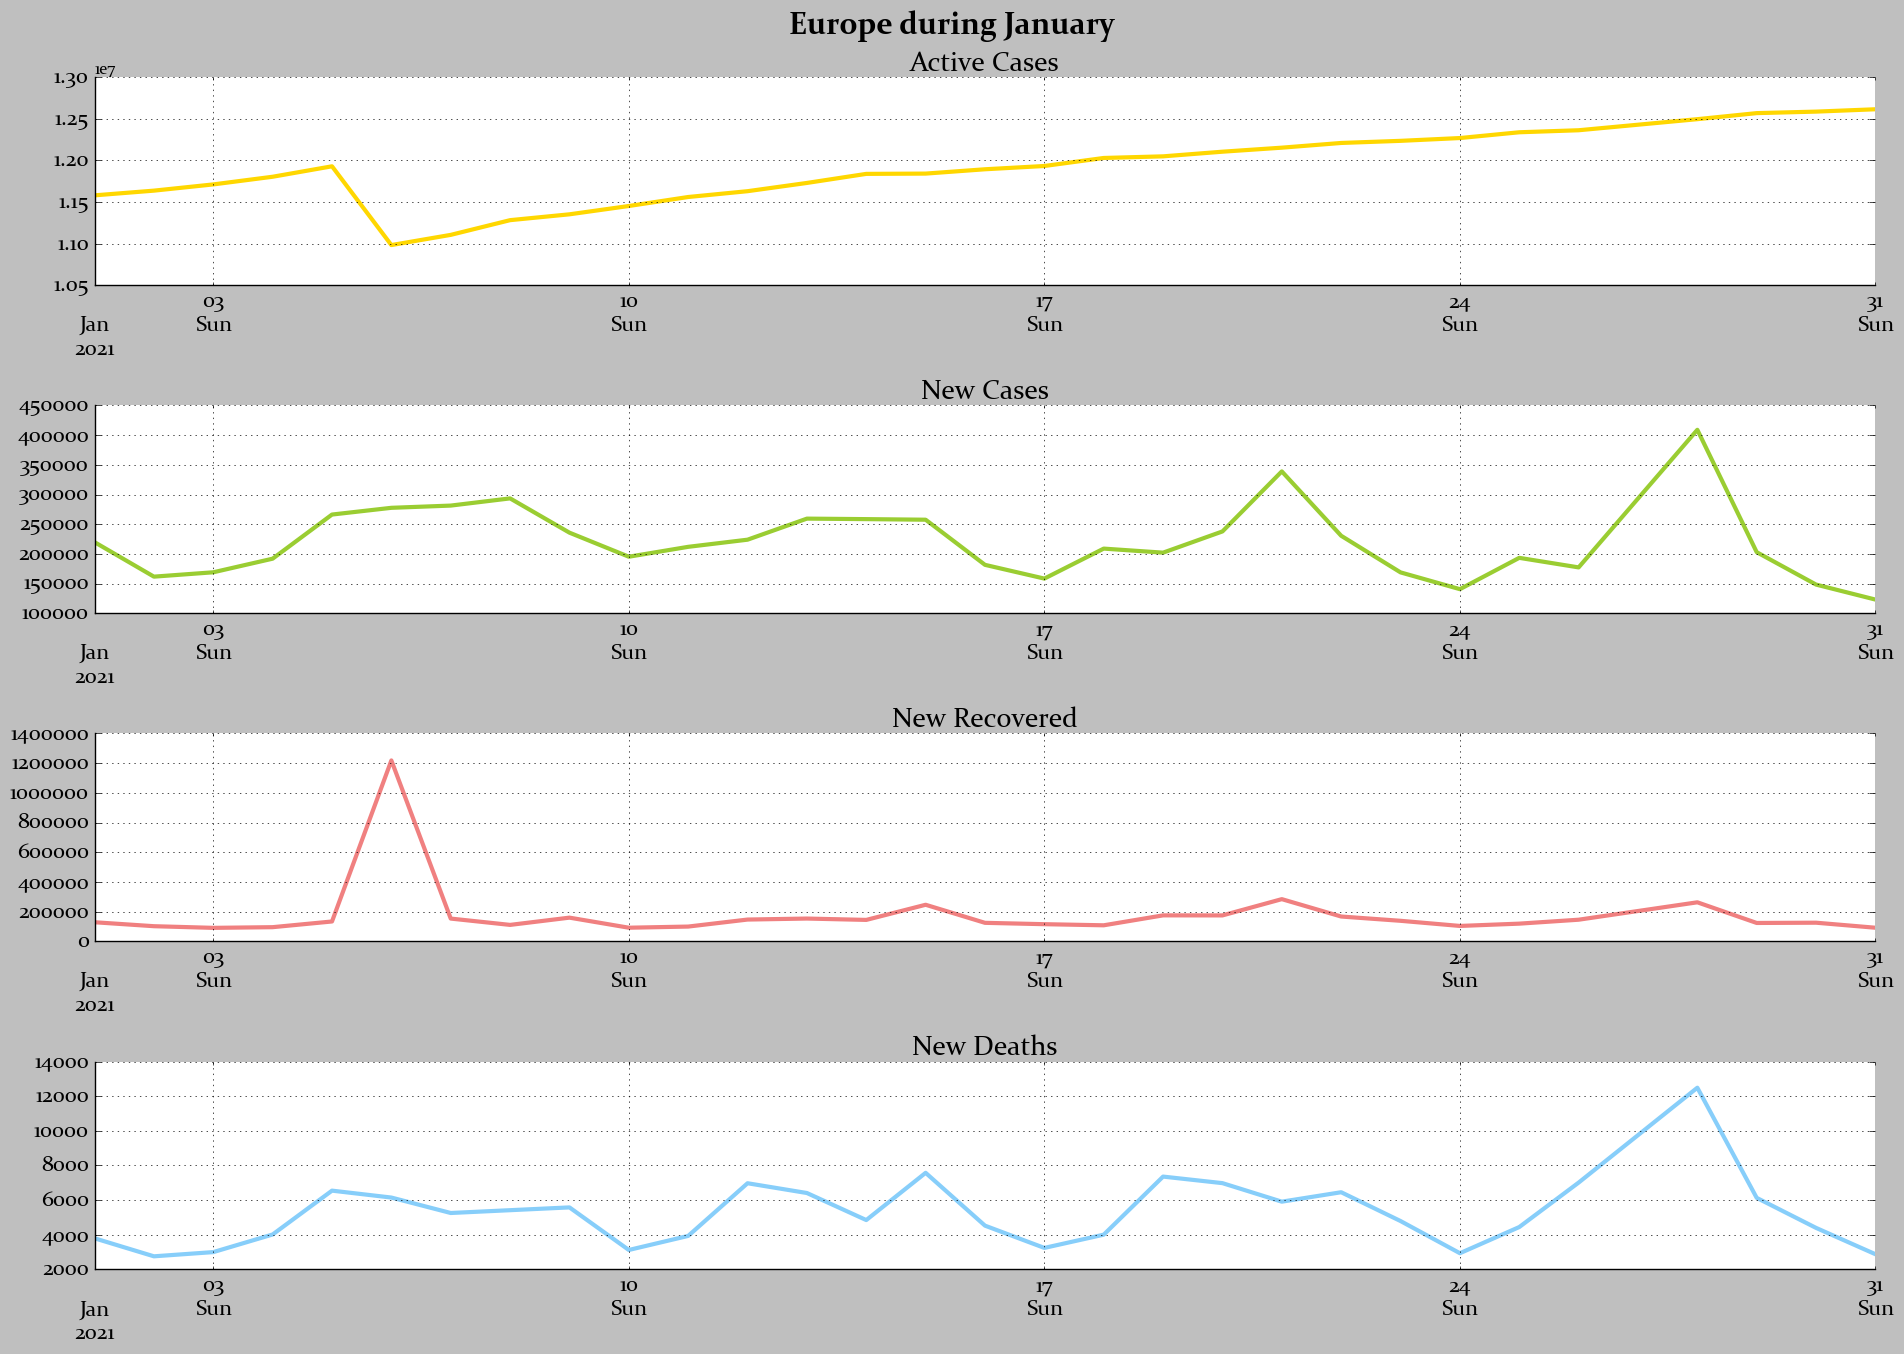

In [10]:
for month,year in zip(months_info['Month'].tolist(), months_info['Year'].tolist()):
    month_num = datetime.strptime(month[:3], "%b").month
    continent.monthly_plot(['ActiveCases', 'NewCases', 'NewRecovered', 'NewDeaths'], month_num, year,save = True)

#### Daily increases in deaths, recoveries, active cases,new cases.

In [11]:
continent.daily_increase3(save = True)


#### Closed cases ratio
$$TotalRecovered + TotalDeaths = TotalCases - ActiveCases$$

Answer:
    TotalRecovered TotalDeaths
173        96.057%      3.943%
Total time taken in closed_cases_pie function is: 0.002533333333333333 minutes.


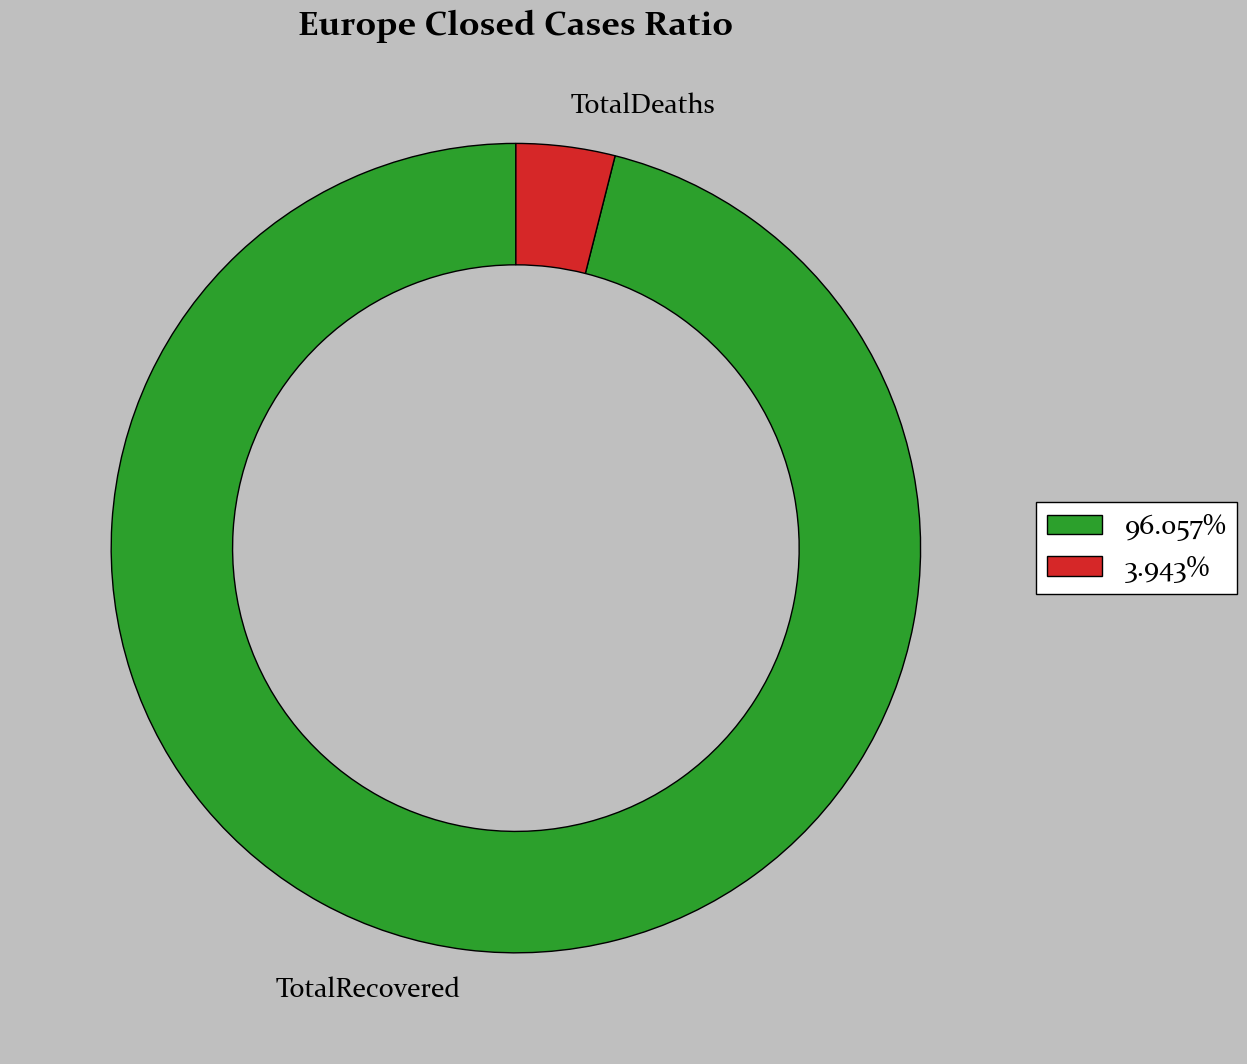

In [12]:
updated_totals = df[df['Date'].dt.date == continent.last_update]\
    [['TotalCases', 'ActiveCases', 'TotalRecovered', 'TotalDeaths']]
res = (updated_totals[['TotalRecovered', 'TotalDeaths']] / (updated_totals['TotalCases']\
                                             .values[0] - updated_totals['ActiveCases'].values[0])) * 100
res = round(res, 3).astype(str) + '%'
print('Answer:')
print(res)
continent.closed_cases_pie(save = True)

#### Measures Boxplot

In [13]:
continent.boxplot(['ActiveCases'], save=True)

In [14]:
measures = ['NewCases','NewRecovered']
continent.boxplot(measures, save=True)

In [15]:
continent.boxplot(['NewDeaths'], save=True)

### Part Three - Basic Analysis

In [16]:
print("Q1.Find the date of the day with the highest New Cases.")
res_date = df[df['NewCases'] == df['NewCases'].max()]['Date'].dt.date
print('Answer:')
pd.DataFrame(res_date)

Q1.Find the date of the day with the highest New Cases.
Answer:


Date
163  2021-01-28

In [17]:
print("Q2.Find the countries Case Fatality Ratio")
print('Answer: CFR= TotalDeaths/(TotalDeaths + TotalRecovered)')
continent.case_fatality_ratio().astype('str') + '%'



Q2.Find the countries Case Fatality Ratio
Answer: CFR= TotalDeaths/(TotalDeaths + TotalRecovered)


'5.082%'